In [28]:
# Instalamos librerías que podriamos necesitar
%pip install xgboost
!pip install import_ipynb
!pip install openpyxl
!pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [29]:
##Librerías

import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn import datasets
from sklearn import tree
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import plotly.express as px
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBRegressor
import import_ipynb
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, tree
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, get_scorer_names, accuracy_score,confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler ## escalar variables
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

import a_funciones as funciones

import joblib  ### para guardar modelos
import openpyxl

Base de datos

In [30]:
#Importamos la base de datos
df_final2 = pd.read_csv('https://media.githubusercontent.com/media/veronica1908/FINANZAS_E4_AIII/main/base_final.txt', sep='\t', header=0, encoding='latin1')
df_final2

,Mes_Pago,Asegurado_Id,Reclamacion,Diagnostico_Codigo,Diagnostico_Desc,Eventos,Valor_Pagado,Poliza_Asegurado_Id,FECHA_INICIO,FECHA_CANCELACION,...,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,CancelaciÃ³n,Edad,Grupo_Edad,Mes pago,AÃ±o pago,Duracion_Cobertura,Costo_Reclamacion
0,2018-03-01,4834968,EXAMENES DE DIAGNOSTICO,Z011,EXAMEN DE OÃÂDOS Y DE LA AUDICIÃÂN,1,495341.335642,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,3,2018,729,495341.335642
1,2018-04-01,4834968,LABORATORIO CLINICO,9,DIAGNÃÂSTICO PENDIENTE,15,717708.276982,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,4,2018,729,47847.218465
2,2018-03-01,4834968,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,1,427837.347642,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,3,2018,729,427837.347642
3,2018-05-01,4834968,EXAMENES DE DIAGNOSTICO,9,DIAGNÃÂSTICO PENDIENTE,1,496955.561442,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,5,2018,729,496955.561442
4,2018-11-01,4834968,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,2,523223.417642,95576925,2018-01-01,2019-12-31,...,1,0,0,1,50,50-59,11,2018,729,261611.708821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3778164,2019-08-01,25333920,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,1,430625.555842,189568131,2019-04-01,2019-12-31,...,0,0,0,0,31,30-39,8,2019,274,430625.555842
3778165,2018-02-01,17044022,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,1,423728.409242,94128351,2018-01-01,2018-01-05,...,0,0,0,1,38,30-39,2,2018,4,423728.409242
3778166,2018-11-01,52163564,CONSULTA EXTERNA,9,DIAGNÃÂSTICO PENDIENTE,1,485068.989642,101267369,2018-01-01,2019-12-31,...,0,0,0,1,13,10-19,11,2018,729,485068.989642
3778167,2019-12-01,48242859,CONSULTA DE URGENCIAS,9,DIAGNÃÂSTICO PENDIENTE,1,529464.601576,175057169,2018-10-18,2019-12-31,...,0,0,0,0,17,10-19,12,2019,439,529464.601576


In [31]:
#Observar si existen nulos
df_final2.isnull().sum()

Mes_Pago                0
Asegurado_Id            0
Reclamacion             0
Diagnostico_Codigo      0
Diagnostico_Desc        0
Eventos                 0
Valor_Pagado            0
Poliza_Asegurado_Id     0
FECHA_INICIO            0
FECHA_CANCELACION       0
FECHA_FIN               0
Mujer                   0
FechaNacimiento         0
Ciudad                  0
CANCER                  0
EPOC                    0
DIABETES                0
HIPERTENSION            0
ENF_CARDIOVASCULAR      0
CancelaciÃ³n            0
Edad                    0
Grupo_Edad             82
Mes pago                0
AÃ±o pago               0
Duracion_Cobertura      0
Costo_Reclamacion       0
dtype: int64

In [32]:
#Como son pocos los nulos que estan en la variable "Grupo_Edad", procedemos a eliminarlos

df_final2 = df_final2.dropna(subset=['Grupo_Edad'])

# Opcionalmente, puedes resetear el índice del DataFrame si es necesario
df_final2.reset_index(drop=True, inplace=True)

In [33]:
#Verificamos la existencia de nulos
df_final2.isnull().sum()

Mes_Pago               0
Asegurado_Id           0
Reclamacion            0
Diagnostico_Codigo     0
Diagnostico_Desc       0
Eventos                0
Valor_Pagado           0
Poliza_Asegurado_Id    0
FECHA_INICIO           0
FECHA_CANCELACION      0
FECHA_FIN              0
Mujer                  0
FechaNacimiento        0
Ciudad                 0
CANCER                 0
EPOC                   0
DIABETES               0
HIPERTENSION           0
ENF_CARDIOVASCULAR     0
CancelaciÃ³n           0
Edad                   0
Grupo_Edad             0
Mes pago               0
AÃ±o pago              0
Duracion_Cobertura     0
Costo_Reclamacion      0
dtype: int64

In [34]:
# Borramos las variables que no necesitamos y no aportan al modelo
# Se borra Diagnostico_Desc porque se va a dejar la columna del codigo del CIE10 y es lo mismo

columnas_a_borrar = ['Mes_Pago','Asegurado_Id','Diagnostico_Desc','Poliza_Asegurado_Id','FECHA_INICIO','FECHA_CANCELACION','FECHA_FIN','FechaNacimiento','Edad','Mes pago','AÃ±o pago','Costo_Reclamacion','Duracion_Cobertura','Diagnostico_Codigo','Eventos']

df_final2 = df_final2.drop(columns=columnas_a_borrar)
df_final2.head()

,Reclamacion,Valor_Pagado,Mujer,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,CancelaciÃ³n,Grupo_Edad
0,EXAMENES DE DIAGNOSTICO,495341.335642,0,Cali,0,0,1,0,0,1,50-59
1,LABORATORIO CLINICO,717708.276982,0,Cali,0,0,1,0,0,1,50-59
2,CONSULTA EXTERNA,427837.347642,0,Cali,0,0,1,0,0,1,50-59
3,EXAMENES DE DIAGNOSTICO,496955.561442,0,Cali,0,0,1,0,0,1,50-59
4,CONSULTA EXTERNA,523223.417642,0,Cali,0,0,1,0,0,1,50-59


In [35]:
# Renombramos la columna 'CancelaciÃ³n' a 'Cancelacion'
df_final2.rename(columns={'CancelaciÃ³n': 'Cancelacion'}, inplace=True)
df_final2.head()

,Reclamacion,Valor_Pagado,Mujer,Ciudad,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Cancelacion,Grupo_Edad
0,EXAMENES DE DIAGNOSTICO,495341.335642,0,Cali,0,0,1,0,0,1,50-59
1,LABORATORIO CLINICO,717708.276982,0,Cali,0,0,1,0,0,1,50-59
2,CONSULTA EXTERNA,427837.347642,0,Cali,0,0,1,0,0,1,50-59
3,EXAMENES DE DIAGNOSTICO,496955.561442,0,Cali,0,0,1,0,0,1,50-59
4,CONSULTA EXTERNA,523223.417642,0,Cali,0,0,1,0,0,1,50-59


In [36]:
# Verificamos cuantos unicos tiene cada variable para relacionarnos con el modelo
unicos_por_columna = df_final2.nunique()

# Imprimir el número de valores únicos por columna
print(unicos_por_columna)


Reclamacion               41
Valor_Pagado          520963
Mujer                      2
Ciudad                     6
CANCER                     2
EPOC                       2
DIABETES                   2
HIPERTENSION               2
ENF_CARDIOVASCULAR         2
Cancelacion                2
Grupo_Edad                11
dtype: int64


Convertir a dummies

In [37]:
df_dummies = df_final2.copy()

In [38]:
# Identificamos las columnas categoricas
cat_df_final = df_dummies.select_dtypes(include=['object']).columns

# Crear un listado para almacenar el detalle de las categorías únicas de cada columna
detalle_categorias = []

# Iterar a través de las columnas categóricas y almacenar el detalle de las categorías únicas en el listado
for column in cat_df_final:
    unique_categories = df_dummies[column].unique()
    detalle_categorias.append((column, unique_categories))

# Mostrar el detalle de las categorías únicas
for column, categories in detalle_categorias:
    print(f'Categorías en "{column}":')
    for category in categories:
        print(f'    {category}')

Categorías en "Reclamacion":
    EXAMENES DE DIAGNOSTICO
    LABORATORIO CLINICO
    CONSULTA EXTERNA
    CONSULTA DE URGENCIAS
    CIRUGIA AMBULATORIA POR ENFERMEDAD
    INFILTRACIONES
    TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES
    CONSULTAS PRENATALES
    ATENCION DEL PARTO
    TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD
    TRATAMIENTOS ESPECIFICOS
    FISIOTERAPIA ILIMITADA
    TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD
    TRASLADO EN AMBULANCIA
    TRATAMIENTO AMBULATORIO POR CANCER
    CIRUGIA AMBULATORIA POR ACCIDENTE
    PAMD
    Sin Informacion
    TRATAMIENTO QUIRURGICO HOSPITALARIO POR ACCIDENTE
    CONCILIACION
    TRATAMIENTO MEDICO AMBULATORIO POR ENFERMEDAD EN URGENCIAS
    ODONTOLOGÃÂA
    TRATAMIENTO QUIRURGICO HOSPITALARIO POR CANCER Y COMPLICACIONES
    COBERTURA PROGRAMA PALIATIVOS
    TRATAMIENTOS AMBULATORIOS ESPECIALES
    DIALISIS
    TRATAMIENTO MEDICO HOSPITALARIO POR COMPLICACIONES DEL EMBARAZO
    TRATAMIENTO MEDICO HOSPITALARIO POR ACCI

In [39]:
#list_dummies = cat_df_final.difference(['Diagnostico_Codigo'])
#list_dummies

In [40]:
# Creamos un objeto LabelEncoder
le = LabelEncoder()

# Iterar a través de las columnas categóricas y aplicar LabelEncoder si hay 2 categorías
for column in cat_df_final:
    if len(df_dummies[column].unique()) == 2:  # Verificar si hay solo 2 categorías
       df_dummies[column] = le.fit_transform(df_dummies[column])

# Variables con mas de 2 categorias
df_dummies_final = pd.get_dummies(df_dummies)

In [41]:
df_dummies_final.head(10)

,Valor_Pagado,Mujer,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR,Cancelacion,Reclamacion_ANEXO EXEQUIAL,Reclamacion_ATENCION DEL PARTO,...,Grupo_Edad_10-19,Grupo_Edad_100-109,Grupo_Edad_20-29,Grupo_Edad_30-39,Grupo_Edad_40-49,Grupo_Edad_50-59,Grupo_Edad_60-69,Grupo_Edad_70-79,Grupo_Edad_80-89,Grupo_Edad_90-99
0,4.953413e+05,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
1,7.177083e+05,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
2,4.278373e+05,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
3,4.969556e+05,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
4,5.232234e+05,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
5,6.849395e+05,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
6,1.134575e+06,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
7,4.306256e+05,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
8,4.278373e+05,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False
9,4.351747e+05,0,0,0,1,0,0,1,False,False,...,False,False,False,False,False,True,False,False,False,False


Escalado y/o estandarización de los datos

In [42]:
# Muestrea una porción de los datos
df_sample = df_dummies_final.sample(frac=0.05)  # Usando el 5% de los datos
y= df_sample['Valor_Pagado']
X1_sample = df_sample.loc[:, ~df_sample.columns.isin(['Valor_Pagado'])]

scaler = StandardScaler()
scaler.fit(X1_sample)
X2_sample = scaler.transform(X1_sample)
X= pd.DataFrame(X2_sample, columns=X1_sample.columns)

In [43]:
# Comose tiene una base de datos demasiado grande se habra un proceso combinando de Reducción de Dimensionalidad y 
# Muestreo para seleccionar el conjunto de datos que se la va a aplicar al modelo
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA

# Muestrea una porción de los datos
#df_sample = df_dummies_final.sample(frac=0.1)  # Usando el 10% de los datos
#y= df_sample['Valor_Pagado']
#X1_sample = df_sample.loc[:, ~df_sample.columns.isin(['Valor_Pagado'])]

# Escalar los datos
#scaler = StandardScaler()
#X2_sample = scaler.fit_transform(X1_sample)

# Aplicar PCA para reducir la dimensionalidad
#pca = PCA(n_components=0.95)  # Mantén el 95% de la varianza
#X_reduced_sample = pca.fit_transform(X2_sample)

# Convertir de nuevo a DataFrame
#X= pd.DataFrame(X_reduced_sample)

|--- Reclamacion_TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD <= 6.31
|   |--- Reclamacion_TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD <= 5.46
|   |   |--- Reclamacion_TRATAMIENTO HOSPITALARIO POR TRASPLANTES <= 217.31
|   |   |   |--- value: [694214.64]
|   |   |--- Reclamacion_TRATAMIENTO HOSPITALARIO POR TRASPLANTES >  217.31
|   |   |   |--- value: [136566716.46]
|   |--- Reclamacion_TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD >  5.46
|   |   |--- Grupo_Edad_60-69 <= 1.36
|   |   |   |--- value: [4901942.55]
|   |   |--- Grupo_Edad_60-69 >  1.36
|   |   |   |--- value: [10280271.01]
|--- Reclamacion_TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD >  6.31
|   |--- Mujer <= -0.28
|   |   |--- Cancelacion <= 0.16
|   |   |   |--- value: [11080814.47]
|   |   |--- Cancelacion >  0.16
|   |   |   |--- value: [20428696.30]
|   |--- Mujer >  -0.28
|   |   |--- Ciudad_Medellin <= 1.20
|   |   |   |--- value: [8809660.00]
|   |   |--- Ciudad_Medellin >  1.20
|   |   |   |--- 

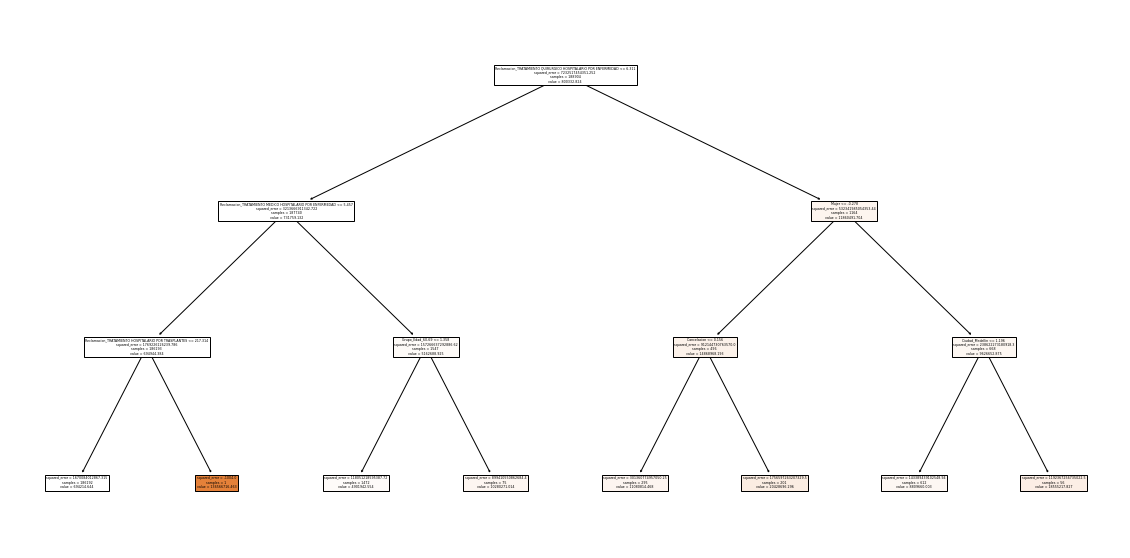

In [44]:
# Crear y entrenar el modelo de árbol de decisión para regresión
rtree = DecisionTreeRegressor(max_depth=3)
rtree.fit(X=X, y=y)

# Generar una representación de texto del árbol de decisión
tree_text = export_text(rtree, feature_names=X.columns.tolist())
print(tree_text)

# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))
plot_tree(rtree, feature_names=X.columns.tolist(), filled=True)
plt.show()

Modelos candidatos

In [47]:
# Define los modelos de regresión seleccionados
#m_linreg = LinearRegression()
m_tree_reg = DecisionTreeRegressor()
m_rf_reg = RandomForestRegressor()
m_gbt_reg = GradientBoostingRegressor()

# Lista de modelos de regresión seleccionados
modelos_reg = [ m_tree_reg, m_rf_reg, m_gbt_reg]



Selección de variables

In [48]:
# Ahora, utiliza estos modelos para seleccionar las variables
var_names = funciones.sel_variables(modelos_reg, X, y, threshold="2*mean")
X2=X[var_names] ### matriz con variables seleccionadas
X2.info()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188904 entries, 0 to 188903
Data columns (total 12 columns):
 #   Column                                                          Non-Null Count   Dtype  
---  ------                                                          --------------   -----  
 0   Cancelacion                                                     188904 non-null  float64
 1   Ciudad_Cali                                                     188904 non-null  float64
 2   Ciudad_Cartagena                                                188904 non-null  float64
 3   DIABETES                                                        188904 non-null  float64
 4   EPOC                                                            188904 non-null  float64
 5   Grupo_Edad_0-9                                                  188904 non-null  float64
 6   Mujer                                                           188904 non-null  float64
 7   Reclamacion_CIRUGIA AMBULATORIA POR EN

Definir modelo ganador

In [49]:
def medir_modelos(modelos, X, y, cv):
    resultados = {}
    for modelo in modelos:
        nombre_modelo = type(modelo).__name__
        scores = cross_val_score(modelo, X, y, cv=cv, scoring='neg_mean_squared_error')
        mse_scores = -scores  # Convertir puntuaciones negativas a positivas
        resultados[nombre_modelo] = mse_scores.mean()
    return resultados

# Calcular MSE para todos los modelos con todas las variables
mse_scores_all = medir_modelos(modelos_reg, X, y, 30)

# Calcular MSE para todos los modelos con variables seleccionadas
mse_scores_varsel = medir_modelos(modelos_reg, X2, y, 30)

print("MSE para todos los modelos con todas las variables:")
for modelo, mse_score in mse_scores_all.items():
    print(f"{modelo}: {mse_score}")

print("\nMSE para todos los modelos con variables seleccionadas:")
for modelo, mse_score in mse_scores_varsel.items():
    print(f"{modelo}: {mse_score}")


MSE para todos los modelos con todas las variables:
DecisionTreeRegressor: 7641899192657.302
RandomForestRegressor: 6624014261876.847
GradientBoostingRegressor: 5899787011067.158

MSE para todos los modelos con variables seleccionadas:
DecisionTreeRegressor: 6420900341465.203
RandomForestRegressor: 6245314209582.46
GradientBoostingRegressor: 6015654715684.96
